Es soll das Newtonverfahren implementiert werden. Finden sie selbst&auml;ndig die n&ouml;tige Theorie zu dem Verfahren heraus.
Schreiben sie dann eine Funktion, der eine beliebige Funktion, ein Startwert, die maximale Anzahl Iterationen und die Abbruchgenauigkeit &uuml;bergeben werden k&ouml;nnen. In der Funktion pr&uuml;fen sie ob eine analytische Berechnung der Ableitung m&ouml;glich ist und f&uuml;hren diese dann durch. Ebenso f&uuml;hren sie eine numerische Differentation durch, wenn die Analytische nicht funktionieren kann. F&uuml;hren sie die Newton-Iteration solange durch bis entweder die maximale Anzahl Schritte erreicht ist oder bis die Abbruchgenauigkeit unterschritten ist.<br />Die Abbruchgenauigkeit $E$ ist gegeben durch

$$|f(x_n)| \le E$$

mit $x_n$ der L&ouml;sungswert und $f(x_n)$ der Funktionswert zum $n$-ten Schritt der Newton-Iteration. Geben sie w&auml;hrend die Iteration die einzelnen Schritte, deren L&ouml;sungswert und die aktuell erreichte Genauigkeit aus. Geben sie ausserdem die berechnete Ableitung an. Kommentieren und Dokumentieren sie das Programm.  
<em>(Entspricht 4 Testaten)</em>  

**Erweiterung**: Bauen sie das Programm so aus, dass es eine interaktive Steuerung und Darstellung mittels <strong>@interact</strong> erh&auml;lt.<br />Dabei wird bei jedem Schritt nicht nur textliche Informationen ausgegeben sondern die Funktion und ihre Tangente am L&ouml;sungswert in einem Koordinatensystem in einem 2D-Plot dargestellt. Beschriften sie die Grafik ebenfalls ver&auml;nderlich pro Iterationsschritt.  
<em>(Entspricht 2 Testaten (insgesamt 6))</em>  

In [2]:
def ableiten(f,xn):
    """ prüft analytische Ableitung, berechnet ansonsten die numerische
nimmt an die Funktion ist abhängig von x und das die Auswertung an jeder Stelle funktioniert.
besser wäre mit try/except, haben wir aber nicht behandelt
Rückgabewert ist"""
    if type(f) == sage.symbolic.expression.Expression:
        if limit(f, x=xn, dir='-') == limit(f, x=xn, dir='+'):
            #Funktion ist stetig
            if limit(f.diff(), x=xn, dir='-') == limit(f.diff(), x=xn, dir='+'):
                # Die Funktion ist diffbar
                return f.diff()(xn),false
    else:
        # Stetig aber nicht diffbar an x=schnittpunkt, oder gar keine expression
        # daher Berechnung Differenzenquotienten
        h = 0.01
        return limit((f(x=xn+h) - f(x=xn))/h, h=0),true

it : Iterationen, x : Lösung, f(x_n) : Genauigkeit, f'(x_n) : Ableitung
it = 1, x =  0.2667, f(x_n) =  0.0190, f'(x_n) =   0.48, Num: False


/usr/local/sage-6.10/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:19: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


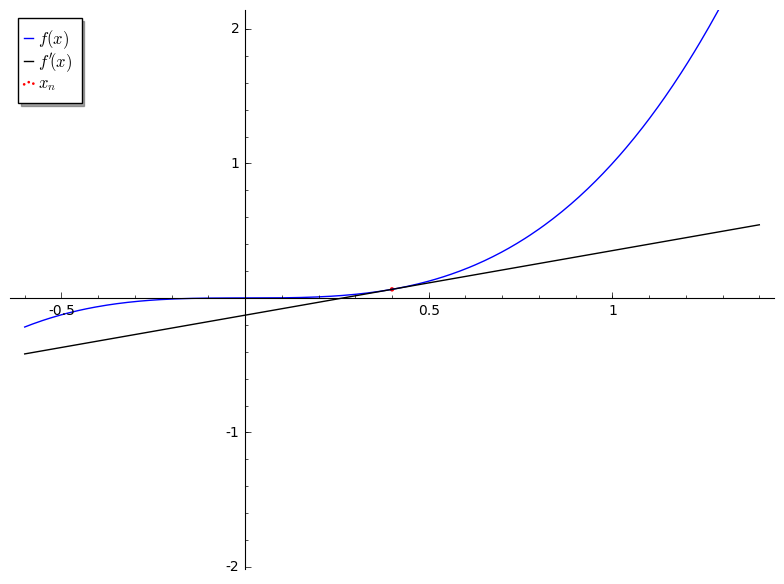

it = 2, x =  0.1778, f(x_n) =  0.0056, f'(x_n) =   0.21, Num: False


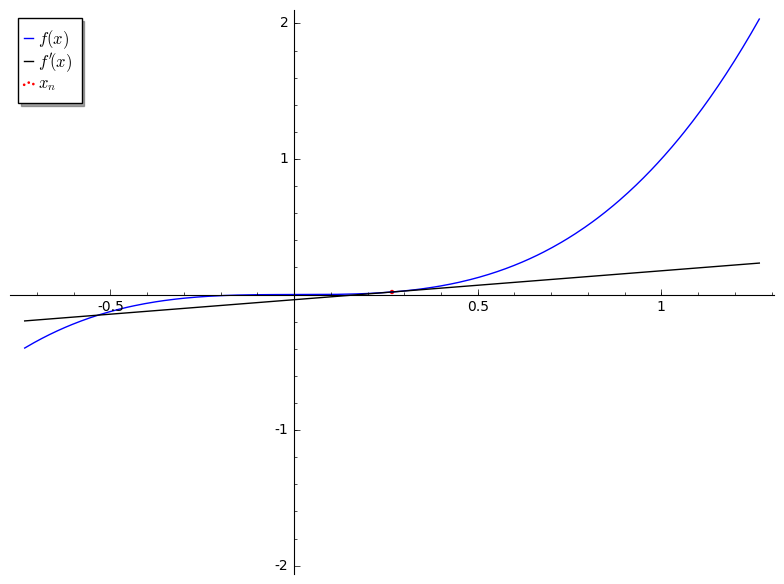

it = 3, x =  0.1185, f(x_n) =  0.0017, f'(x_n) =   0.09, Num: False


0.1185185185185185

In [7]:
from ipywidgets import interact, interactive
from ipywidgets import IntSlider, FloatSlider, Text, FloatText

@interact(f = Text(value='x**3',description='f'), 
         x0 = FloatSlider(value=0.4, min=0.01, max=2),
         maxit = IntSlider(value=20, min=1, max=30),
         tol = FloatText(value=0.01),
         plott = True, __manual=True)
def newton(f='x**3',x0=0.4,maxit=20,tol=0.01,plotten=True):
    print ("it : Iterationen, x : Lösung, f(x_n) : Genauigkeit, f'(x_n) : Ableitung") 
    f = eval(f)
    # Anzahl Iterationen
    it = 0
    # Werte x_n beginnend mit dem Startwert x_0
    xn = x0
    # Führe Iterationen solange aus, bis tol oder maxit Schritte erreicht ist
    while abs(f(x=xn)) > tol and it < maxit:
        # Prüfe Ableitung
        fdiff, numerisch = ableiten(f,xn)
        # Newton-Schritt"
        xnp = xn - f(x=xn)/fdiff
        # Anzahl Schritte hochzählen
        it += 1
        # Ausgabe des Schritts
        print ("it = %i, x = %7.4f, f(x_n) = %7.4f, f'(x_n) = %6.2f, Num: %s" % (it,xnp,f(x=xnp),fdiff,numerisch))
        # plot
        if plotten:
            p = plot(lambda x: f(x=x),xmin=xn-1,xmax=xn+1,legend_label='$f(x)$')
            p += point([xn,f(x=xn)],color='red',legend_label='$x_n$')
            p += plot(fdiff*(x-xn)+f(x=xn),color='black',xmin=xn-1,xmax=xn+1,legend_label='$f\'(x)$')
            p.show(ymin=f(x=xn)-2,ymax=f(x=xn)+2)
        xn = xnp
    return xn

In [8]:
newton('x**3+1',0.4,20,0.01,plotten=false)

it : Iterationen, x : Lösung, f(x_n) : Genauigkeit, f'(x_n) : Ableitung
it = 1, x = -1.8167, f(x_n) = -4.9955, f'(x_n) =   0.48, Num: False
it = 2, x = -1.3121, f(x_n) = -1.2590, f'(x_n) =   9.90, Num: False
it = 3, x = -1.0684, f(x_n) = -0.2194, f'(x_n) =   5.16, Num: False
it = 4, x = -1.0043, f(x_n) = -0.0129, f'(x_n) =   3.42, Num: False
it = 5, x = -1.0000, f(x_n) = -0.0001, f'(x_n) =   3.03, Num: False


/usr/local/sage-6.10/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:19: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


-1.00001821667409

In [27]:
def g(x): return x^2

In [31]:
newton('g',0.4,20,'0.01',plotten=false)

it : Iterationen, x : Lösung, f(x_n) : Genauigkeit, f'(x_n) : Ableitung
it = 1, x =  0.2025, f(x_n) =  0.0410, f'(x_n) =   0.81, Num: True
it = 2, x =  0.1037, f(x_n) =  0.0107, f'(x_n) =   0.41, Num: True
it = 3, x =  0.0542, f(x_n) =  0.0029, f'(x_n) =   0.22, Num: True


0.0542221364117956